In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.image as mpimg
import math



from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

from IPython.display import Image

In [2]:
#read the files

file1 = "Output/cleanMovies.csv"

df = pd.read_csv(file1)


In [3]:
df.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Type
0,1,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,0
1,2,The Matrix,1999,18.0,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski",0
2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,"Anthony Russo,Joe Russo",0
3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,Robert Zemeckis,0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,Sergio Leone,0


In [4]:
# add one more column for the type of streaming service
df.insert(9,"Service",'',True)
df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Service,Directors,Type
0,1,Inception,2010,13.0,8.8,1,0,0,0,,Christopher Nolan,0
1,2,The Matrix,1999,18.0,8.7,1,0,0,0,,"Lana Wachowski,Lilly Wachowski",0
2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,,"Anthony Russo,Joe Russo",0
3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,,Robert Zemeckis,0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,,Sergio Leone,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,,Bruce Bilson,0
16740,16741,The Poof Point,2001,7.0,4.7,0,0,0,1,,Neal Israel,0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,,Neil Gelinas,0
16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,,Richard Slater-Jones,0


In [5]:
service = []
for index,row in df.iterrows():
    if (row['Netflix'] == 1) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Netflix')
        
    elif (row['Netflix'] == 0) & (row['Hulu'] == 1) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Hulu')
        
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 1) & (row['Disney+'] == 0):
        service.append('Prime Video')
        
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 1):
        service.append('Disney+')
    
    else:
        service.append("Multiple")
        
df['Service'] = service


In [6]:
df.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Service,Directors,Type
0,1,Inception,2010,13.0,8.8,1,0,0,0,Netflix,Christopher Nolan,0
1,2,The Matrix,1999,18.0,8.7,1,0,0,0,Netflix,"Lana Wachowski,Lilly Wachowski",0
2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,Netflix,"Anthony Russo,Joe Russo",0
3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,Netflix,Robert Zemeckis,0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,Multiple,Sergio Leone,0


In [7]:
df.Service.value_counts()

Prime Video    11758
Netflix         3188
Hulu             639
Multiple         627
Disney+          532
Name: Service, dtype: int64

In [8]:
df['Prime Video'].sum()

12354

In [9]:
aveService = df.groupby('Service').IMDb.mean()
aveService

Service
Disney+        6.433333
Hulu           6.152698
Multiple       6.134084
Netflix        6.265322
Prime Video    5.752731
Name: IMDb, dtype: float64

In [10]:
df.Type.value_counts()

0    16744
Name: Type, dtype: int64

In [11]:
# Create the bins on Age column in which Data will be held  
bins = [0,7, 13, 17, 99]

# Create the names for the five bins
group_names = ["G", "PG", "PG-13", "R"]

In [12]:
df["Age Bin"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)
df

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Service,Directors,Type,Age Bin
0,1,Inception,2010,13.0,8.8,1,0,0,0,Netflix,Christopher Nolan,0,PG
1,2,The Matrix,1999,18.0,8.7,1,0,0,0,Netflix,"Lana Wachowski,Lilly Wachowski",0,R
2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,Netflix,"Anthony Russo,Joe Russo",0,PG
3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,Netflix,Robert Zemeckis,0,G
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,Multiple,Sergio Leone,0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Disney+,Bruce Bilson,0,NaN
16740,16741,The Poof Point,2001,7.0,4.7,0,0,0,1,Disney+,Neal Israel,0,G
16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Disney+,Neil Gelinas,0,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Disney+,Richard Slater-Jones,0,NaN


# Bar charts between Age and Services

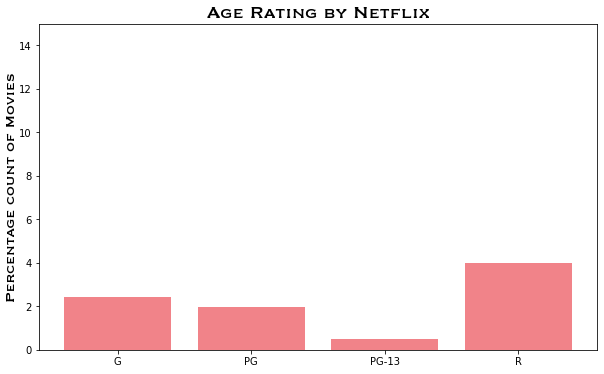

In [13]:
net = df.loc[df.Service == "Netflix"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values/len(df['Service'])*100, color='#E50914', alpha=0.5, align="center")

#PADDING
plt.ylim(0, 15)

# Give our chart some labels and a tile
plt.title("Age Rating by Netflix",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Percentage count of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

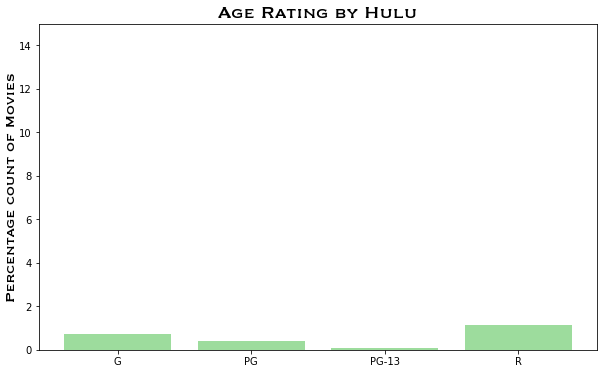

In [14]:
net = df.loc[df.Service == "Hulu"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values/len(df['Service'])*100, color='#3DBB3D', alpha=0.5, align="center")

#PADDING
plt.ylim(0, 15)

# Give our chart some labels and a tile
plt.title("Age Rating by Hulu",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Percentage count of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

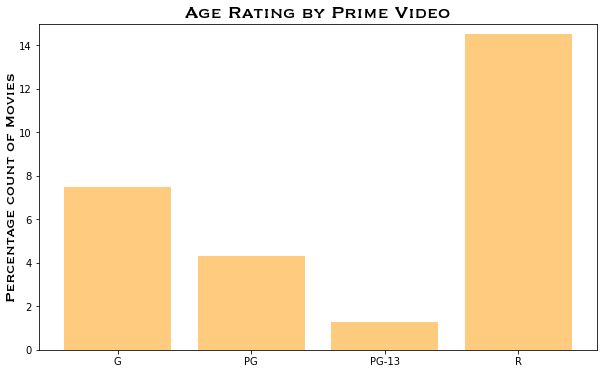

In [15]:
net = df.loc[df.Service == "Prime Video"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values/len(df['Service'])*100, color='#FF9900', alpha=0.5, align="center")

#PADDING
plt.ylim(0, 15)

# Give our chart some labels and a tile
plt.title("Age Rating by Prime Video",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Percentage count of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

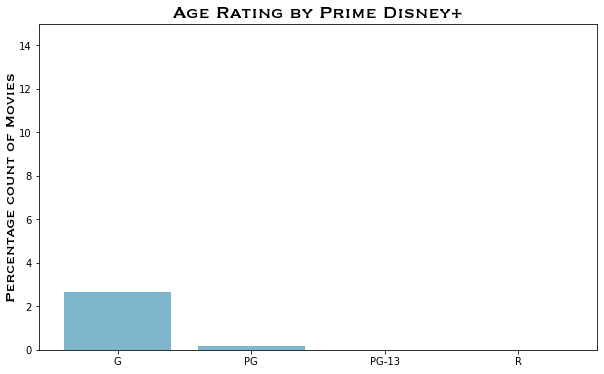

In [16]:
net = df.loc[df.Service == "Disney+"]
countAge = net.groupby("Age Bin").size()
#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countAge.index, countAge.values/len(df['Service'])*100, color='#006E99', alpha=0.5, align="center")

#PADDING
plt.ylim(0, 15)

# Give our chart some labels and a tile
plt.title("Age Rating by Prime Disney+",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Percentage count of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

# Bar charts between IMDb and Services


In [17]:
countIMDb = net.groupby("IMDb").size()
countIMDb

IMDb
1.6     1
2.4     1
3.0     1
3.3     1
3.4     1
4.0     1
4.1     3
4.2     3
4.3     1
4.5     2
4.6     2
4.7    10
4.8     5
4.9     5
5.0    13
5.1     7
5.2     8
5.3    11
5.4    13
5.5    13
5.6    10
5.7    12
5.8    11
5.9    21
6.0    14
6.1    20
6.2    25
6.3    17
6.4    23
6.5    28
6.6    17
6.7    24
6.8    19
6.9    25
7.0    10
7.1    14
7.2    23
7.3    23
7.4    13
7.5    13
7.6    11
7.7     8
7.8    11
7.9     4
8.0    14
8.1     5
8.2     2
8.3     5
8.4     3
8.5     2
8.6     1
8.7     1
dtype: int64

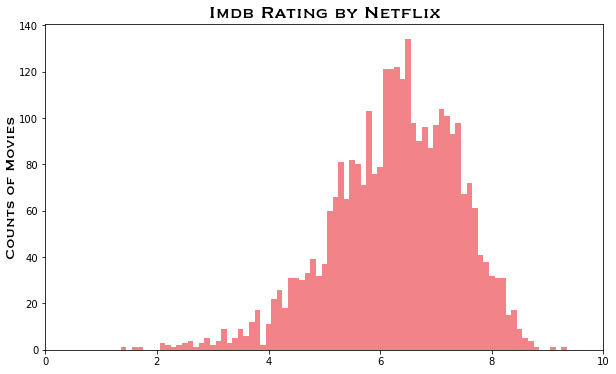

In [18]:
net = df.loc[df.Service == "Netflix"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#E50914', alpha=0.5, align="center",width=0.1)

#PADDING
plt.xlim(0, 10)

# Give our chart some labels and a tile
plt.title("Imdb Rating by Netflix",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

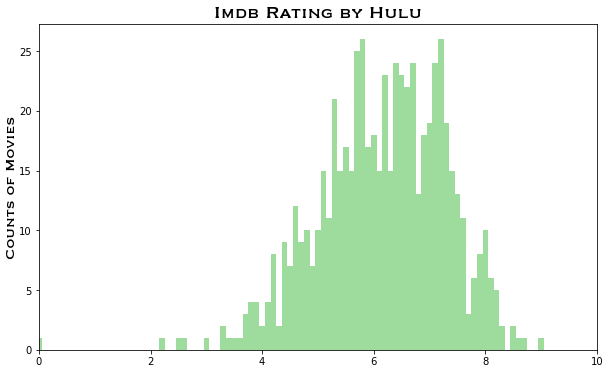

In [19]:
net = df.loc[df.Service == "Hulu"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#3DBB3D', alpha=0.5, align="center",width=0.1)

#PADDING
plt.xlim(0, 10)

# Give our chart some labels and a tile
plt.title("Imdb Rating by Hulu",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

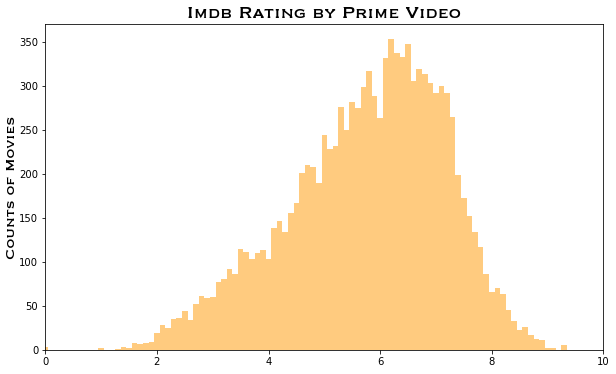

In [20]:
net = df.loc[df.Service == "Prime Video"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#FF9900', alpha=0.5, align="center",width=0.1)

#PADDING
plt.xlim(0, 10)

# Give our chart some labels and a tile
plt.title("Imdb Rating by Prime Video",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

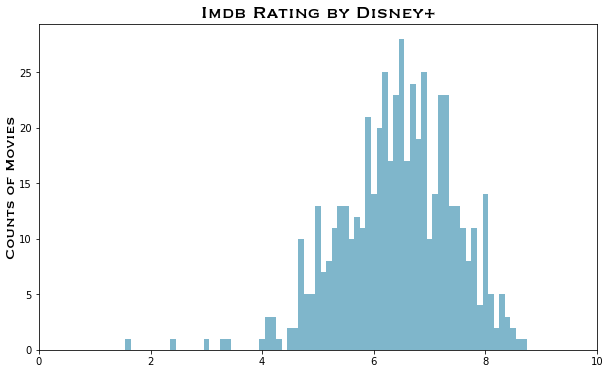

In [21]:
net = df.loc[df.Service == "Disney+"]
countIMDb = net.groupby("IMDb").size()

#figsize
plt.figure(figsize=(10,6))

#raw plot
plt.bar(countIMDb.index, countIMDb.values, color='#006E99', alpha=0.5, align="center",width=0.1)

#PADDING
plt.xlim(0, 10)

# Give our chart some labels and a tile
plt.title("Imdb Rating by Disney+",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

# Line Graphs Year vs Services

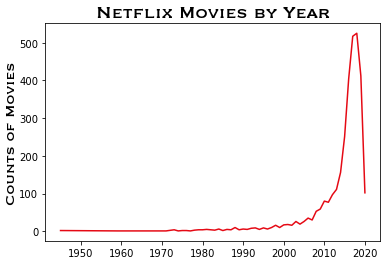

In [22]:
net = df.loc[df.Service == "Netflix"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#E50914')


# Give our chart some labels and a tile
plt.title("Netflix Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

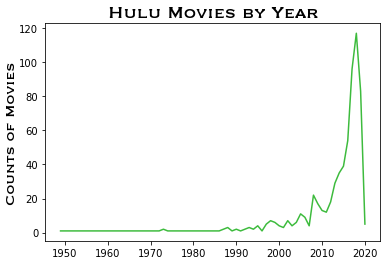

In [23]:
net = df.loc[df.Service == "Hulu"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#3DBB3D')


# Give our chart some labels and a tile
plt.title("Hulu Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

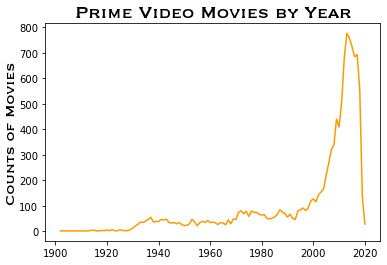

In [24]:
net = df.loc[df.Service == "Prime Video"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#FF9900')


# Give our chart some labels and a tile
plt.title("Prime Video Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()

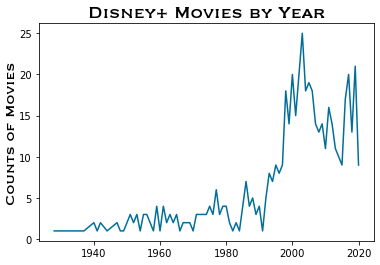

In [25]:
net = df.loc[df.Service == "Disney+"]
countYear = net.groupby("Year").size()
#figsize
plt.plot(figsize=(10,6))

#raw plot
plt.plot(countYear.index, countYear.values, color='#006E99')


# Give our chart some labels and a title
plt.title("Disney+ Movies by Year",fontweight="bold", fontsize=20, name="Copperplate")
plt.xlabel("",fontsize=16, name="Copperplate")
plt.ylabel("Counts of Movies",fontsize=16, name="Copperplate")

#show/save
plt.show()